# Table of Content
<hr style="height:2px">

## [ 1.WorkFlow](#wf)

## [ 2. What is K-Mean ?](#km)

## [3.Importing Library](#il)

##  [4.Loading Dataset ](#ld)

## [5. Data Preprocessing](#dp)

## [6. EDA (Exploratory Data Analysis)](#ed)

## [7. Model Creation and Fitting](#mc)

## [8. Evaluation](#e)

## [9.Conclusion](#c)

<a name='wf'> </a>
# 1. WorkFlow

## College Data ---> Preprocessing Data---> Exploring Data ---> Model Fitting ---> Evaluation

<a name='km'></a>
# 2. What is K-Mean Clustering?

### K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.

### K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

### How does the K-Means Algorithm Work?

### The working of the K-Means algorithm is explained in the below steps:

-  Select the number K to decide the number of clusters.

-  Select random K points or centroids. (It can be other from the input dataset).

- Assign each data point to their closest centroid, which will form the predefined K clusters.

- Calculate the variance and place a new centroid of each cluster.

- Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

-  If any reassignment occurs, then go to step-4 else go to FINISH.

-  The model is ready.

<a name='il'></a>
# 3.Importing Library

In [1]:
import pandas as pd  #Pandas is used to analyze data
import numpy as np   #This library contains a large number of mathematical, algebraic, and transformation functions
import matplotlib.pyplot as plt  # Used for Visualization of data
import seaborn as sns   #Seaborn is a Python data visualization library based on matplotlib
#matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline      
sns.set_style('whitegrid')   # Set the aesthetic style of the plots
plt.style.use('fivethirtyeight')  #"fivethirtyeight" styling which tries to replicate the styles

<a name='ld'></a>
# 4.Loading dataset

### About Data 

In [2]:
# Loading the Dataset using Pandas Library using pd.read_csv(filename with extenstion)

df = pd.read_csv('college_data')

In [3]:
# Printing the Total Row and Column usinf Shape 

df.shape

(777, 19)

In [4]:
# Printing First Five Rows of dataset using head()

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Printing Last Five Row of Dataset using tail()

df.tail()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [6]:
# info(): This method prints information about a DataFrame including the index dtype and column dtypes, non-null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [7]:
# describe() : is used to view some basic statistical details like percentile,mean, std, etc

df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<a name='dp'></a>
#  5.Preprocessing Data

In [8]:
# Checking for Null Values using isnull() it return whole dataset with boolean value (False- Notnull value and True- Null Value)

df.isnull()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# This is other way to check null value and here we use isnull() with sum() 

df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [10]:
# Here we will remove Unnamed 0 since its a string and we cannot convert to number 
# and College Name  doesnt affect or contribute to form cluster so we can exclude them 

In [11]:
# Droppinng Column Unnamed: 0 using drop(column_name,inplace= True argument stands for the data frame has to make changes 
#permanent, axis refers to the dimension of the array, axis=1 (or axis='columns') is vertical axis)

df.drop('Unnamed: 0',inplace=True,axis=1)

In [12]:
# Printing whole dataset to check whether Column Unnamed: 0 is dropped or not (This is just to verfiy, You can skip it)

df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


<a name= "ed"></a>
# 6.Exploring  Data

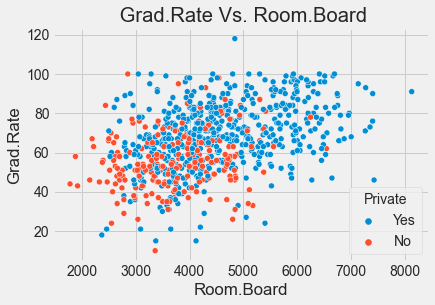

In [13]:
# Firstly we plot Scatterplot of Grad.Rate Vs. Room.Board  using seaborn (Igonre Warning)

sns.scatterplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private')

plt.title(" Grad.Rate Vs. Room.Board")

plt.show()

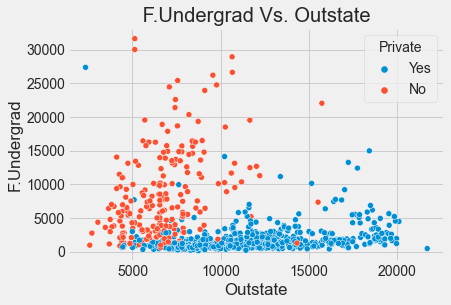

In [14]:
# Now we plot SCatterplot of F.Undergrad Vs. Outstate using Seaborn and Matplotlib (Ignore Warning)

sns.scatterplot(x='Outstate', y='F.Undergrad', data=df, hue='Private')

plt.title(" F.Undergrad Vs. Outstate ")

plt.show()

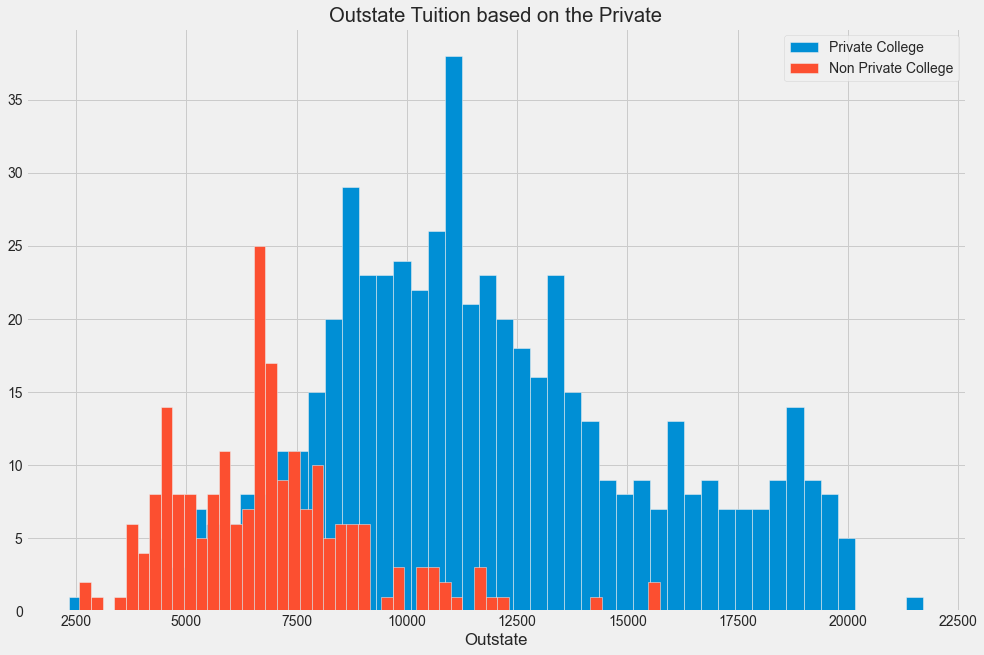

In [15]:
# histogram of Outstate Tuition based on the Private
plt.figure(figsize=(15, 10))

df.loc[df.Private == 'Yes', 'Outstate'].hist(label="Private College", bins=50)
df.loc[df.Private == 'No', 'Outstate'].hist(label="Non Private College", bins=50)
plt.title('Outstate Tuition based on the Private')
plt.xlabel('Outstate')
plt.legend()


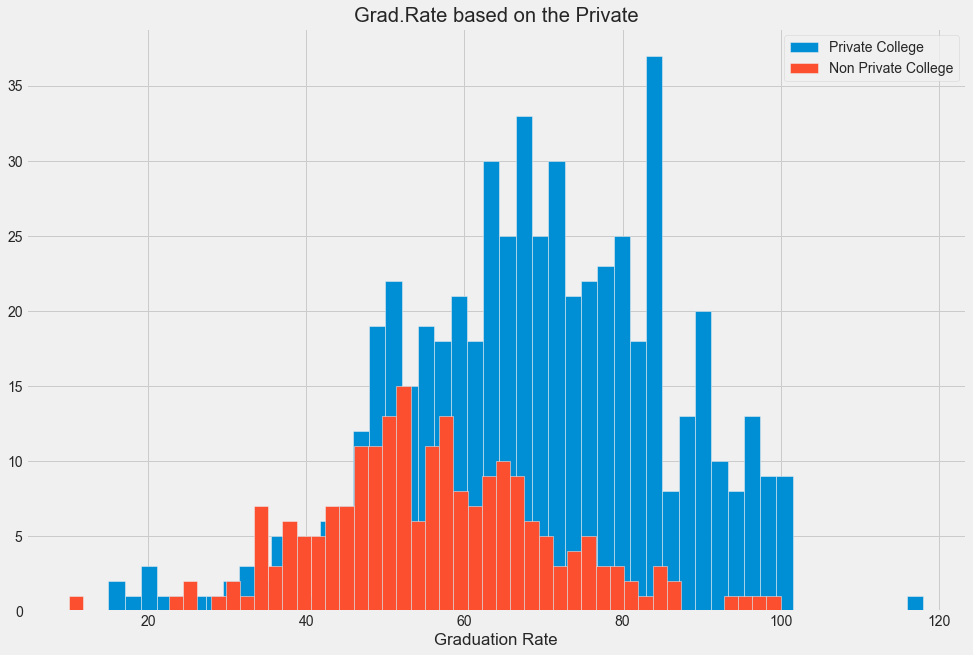

In [16]:
# histogram of Grad.Rate based on the Private

plt.figure(figsize=(15,10))

df.loc[df.Private == 'Yes', 'Grad.Rate'].hist(label="Private College", bins=50)
df.loc[df.Private == 'No', 'Grad.Rate'].hist(label="Non Private College", bins=50)
plt.title('Grad.Rate based on the Private')
plt.xlabel('Graduation Rate')
plt.legend()


In [17]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


#### Set that School's graduation rate to 100 so it makes sense. You may get a warning not an error when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through. 

In [18]:
df.loc[df['Grad.Rate'] > 100, 'Grad.Rate'] = 100

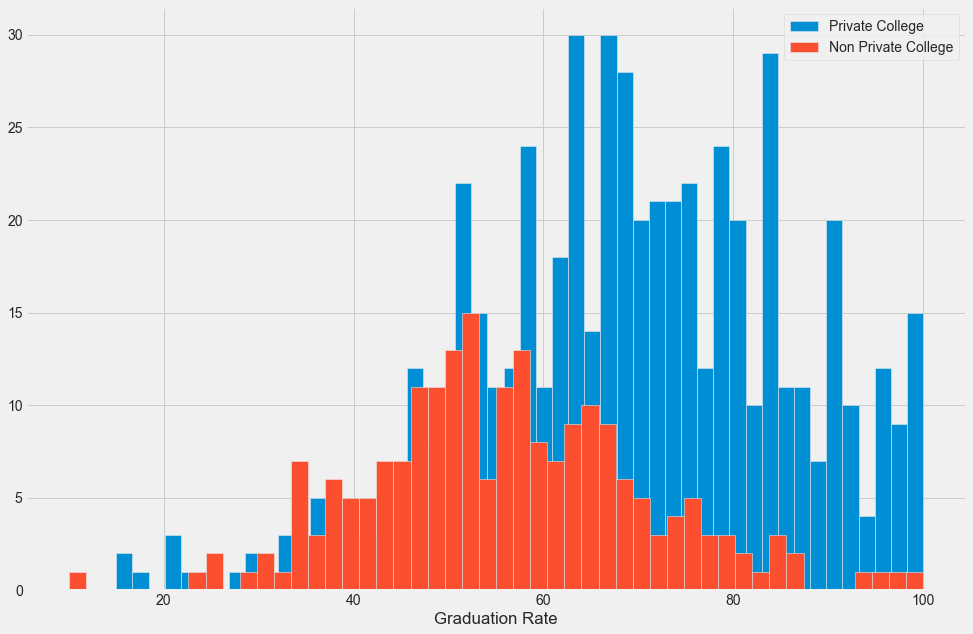

In [19]:
# Creating a Histogram of Gaduration Rate

plt.figure(figsize=(15,10))

df.loc[df.Private == 'Yes', 'Grad.Rate'].hist(label="Private College", bins=50)
df.loc[df.Private == 'No', 'Grad.Rate'].hist(label="Non Private College", bins=50)
plt.xlabel('Graduation Rate')
plt.legend()

<a name='mc'></a>
#  7.Model Creating and Fitting

In [20]:
#Import KMeans from SciKit Learn

from sklearn.cluster import KMeans

In [21]:
#Create an instance of a K Means model with 2 clusters(Goverment and Private)

kmeans = KMeans(2)

In [22]:
# Creating new_df to store Private 

new_df=df['Private']

In [23]:
# Converting String Value to numeric

new_df.replace(['No','Yes'],[1,0],inplace=True)

In [24]:
# Printing to verify

new_df

0      0
1      0
2      0
3      0
4      0
      ..
772    1
773    0
774    0
775    0
776    0
Name: Private, Length: 777, dtype: int64

In [25]:
#Fit the model to all the data except for the Private label


kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [26]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

Text(0.5, 1.0, 'Application vs Accept')

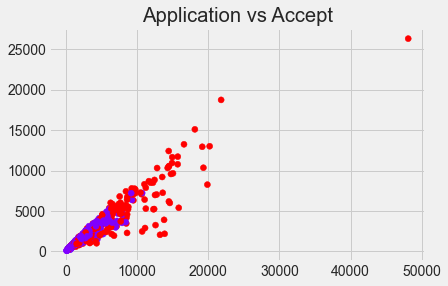

In [65]:
# Visulaize 
plt.scatter(df['Apps'],df['Accept'], c=kmeans.labels_,cmap='rainbow')

plt.title('Application vs Accept')

Text(0.5, 1.0, 'F.Undergrad vs P.Undergrad')

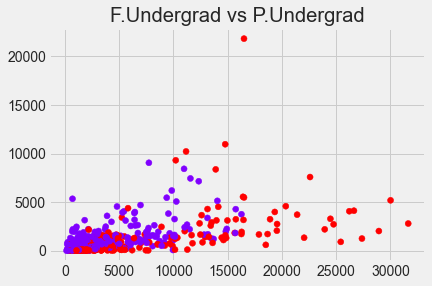

In [66]:
# Visulaize 
plt.scatter(df['F.Undergrad'],df['P.Undergrad'], c=kmeans.labels_,cmap='rainbow')

plt.title('F.Undergrad vs P.Undergrad')

Text(0.5, 1.0, 'Top10perc vs Top25perc')

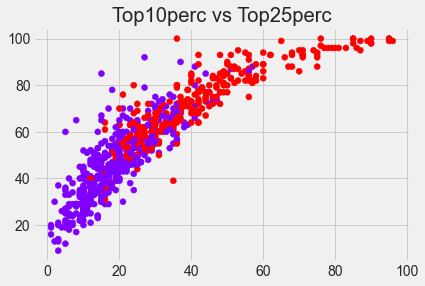

In [67]:
# Visulaize 

plt.scatter(df['Top10perc'],df['Top25perc'], c=kmeans.labels_,cmap='rainbow')

plt.title('Top10perc vs Top25perc')

<a name='e'></a>
# 8.Evaluation

#### There is no perfect way to evaluate clustering if we  don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, we usually won't have label in the real world while doing clustering. 

In [27]:
# Create a new column for df called 'Cluster', which is a 1 for a Private and  0 for a Public/Goveremnt 

#df['Private'] = df.Private.astype("category").cat.codes

df['Private']=new_df

In [28]:
# Printing Private Column which was just created 

df['Private']

0      0
1      0
2      0
3      0
4      0
      ..
772    1
773    0
774    0
775    0
776    0
Name: Private, Length: 777, dtype: int64

In [29]:
# Printing whole dataset

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels. 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df.Private, kmeans.labels_))
print(classification_report(df.Private, kmeans.labels_))

[[ 34 531]
 [ 74 138]]
              precision    recall  f1-score   support

           0       0.31      0.06      0.10       565
           1       0.21      0.65      0.31       212

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df.Private, kmeans.labels_))
print(pd.DataFrame(classification_report(df.Private, kmeans.labels_, output_dict=True)))

0.22136422136422138
                    0           1  accuracy   macro avg  weighted avg
precision    0.314815    0.206278  0.221364    0.260546      0.285201
recall       0.060177    0.650943  0.221364    0.355560      0.221364
f1-score     0.101040    0.313280  0.221364    0.207160      0.158949
support    565.000000  212.000000  0.221364  777.000000    777.000000


## Scaling Data 

In [33]:
# StandardScaler removes the mean and scales each feature/variable to unit variance.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Private', axis=1)
y = df.Private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]]
0.5225225225225225
[[340 225]
 [146  66]]
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       565
           1       0.23      0.31      0.26       212

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



<a name='c'></a>
# Conclusion:

##  This Algorithm performed well,
## Where we were using 17 features(but we had 19 columns but one was label that is whether it is private or not and other was name of the University ) to create 2 cluster (Private and Goverment)  


## Here we had had only two cluster and only 777 rows due to that our accuary of the model is less, however we can increase the accuracy by adding more data as well as adding new clusters to it.

## Here we had an advantage since we had labels however in real world dataset we may not get labels, here we had label so we have done evaluation of clustering.

## Thats it we are done with K-Means Algorithm.....!!!